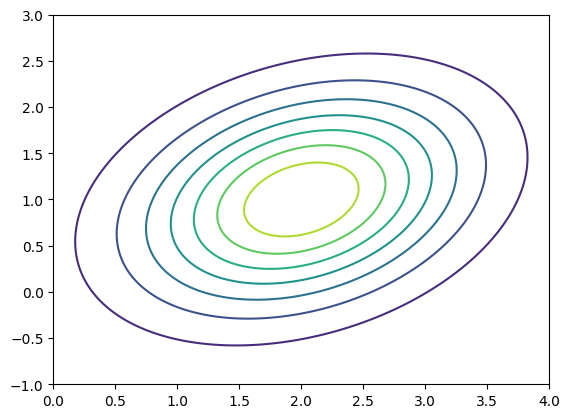

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, Covariance

#Setting
u = np.array([2,1])
V = np.array([[0.8,0.2],[0.2,0.6]])

#Creating the random variable
np.random.seed(seed=1234)
myRand = multivariate_normal(u,V)

#Having a look
res = 1000
fsx = 10*V[0,1]
fsy = 10*V[1,0]
mx = u[0]
my = u[1]
x = np.linspace(mx-fsx,mx+fsx,res)
y = np.linspace(my-fsy,my+fsy,res)
xy = np.dstack(np.meshgrid(x,y))
z = myRand.pdf(xy)
plt.contour(x,y,z)


In [100]:
#Drawing samples
N = 5000
n = 400
samples = myRand.rvs(N*n)
samples = np.reshape(samples, (N,n,2))

means = np.mean(samples, axis=1)
d = samples - means[:,np.newaxis,:]

cov = np.empty((N,n,2,2))
for i in range(N):
    for j in range(n):
        cov[i,j] = np.outer(d[i,j], d[i,j].T)
cov_e = np.mean(cov, axis = 1)

(array([  10.,  139.,  621., 1258., 1506.,  983.,  377.,   89.,   14.,
           3.]),
 array([0.4568648 , 0.49006037, 0.52325593, 0.5564515 , 0.58964706,
        0.62284262, 0.65603819, 0.68923375, 0.72242932, 0.75562488,
        0.78882045]),
 <BarContainer object of 10 artists>)

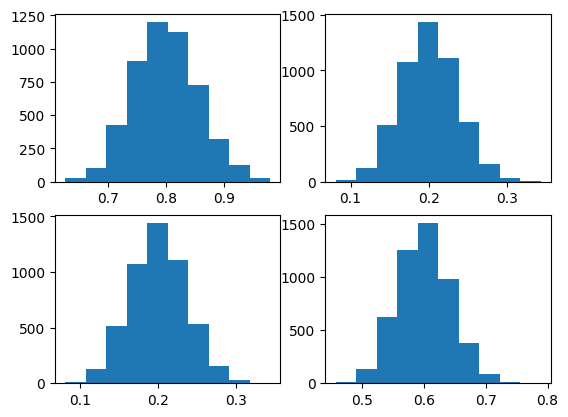

In [101]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(cov_e[:,0,0])
ax[0,1].hist(cov_e[:,0,1])
ax[1,0].hist(cov_e[:,1,0])
ax[1,1].hist(cov_e[:,1,1])

(array([2.700e+01, 1.680e+02, 7.250e+02, 1.322e+03, 1.530e+03, 8.900e+02,
        2.950e+02, 3.800e+01, 4.000e+00, 1.000e+00]),
 array([0.87138261, 0.90255108, 0.93371955, 0.96488803, 0.9960565 ,
        1.02722497, 1.05839344, 1.08956191, 1.12073038, 1.15189886,
        1.18306733]),
 <BarContainer object of 10 artists>)

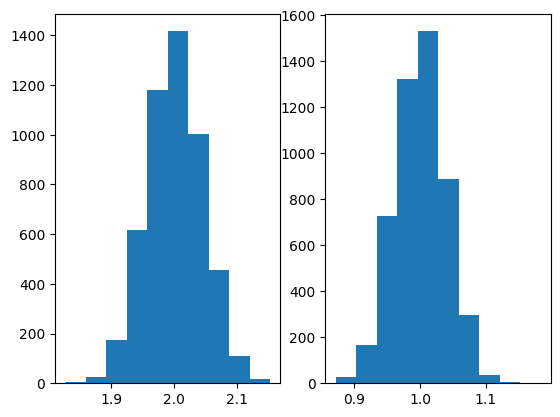

In [102]:
fig, ax = plt.subplots(1,2)
ax[0].hist(means[:,0])
ax[1].hist(means[:,1])